In [18]:
from scipy import stats
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

# Q-Learning

Q-learning algorithmes zijn gebaseerd op de TD-learning modellen die we eerder hebben besproken. Q-learning leert direct de associatie tussen states, actions en outcomes. De robot gaat nu dus niet alleen maar belongingen krijgen maar ook uitzoeken welke handeling de beste is geveven de situatie. 

Details over Q-learning zijn terug te vinden in de college slides en het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6.

Het leren in deze opdracht speelt zich af in een simpel **Markov Decision Process** met de volgende structuur:

![](bandit_arms.png)

In deze taak moet de robot telkens uit een van de schatkisten iets pakken. In sommige schatkisten zit meer geld dan in anderen, maar de robot weet in het begin nog niks over de schatkisten, en verwacht er maar weinig van. In elke ronde wordt uitkomst van een schatkist bepaald door een trekking van een waarde uit een normaalverdeling.

De uitkomsten van schatkisten verschillen in hun gemiddelde maar niet de variatie (standaard deviatie). 

**Let op:** In dit simpele experiment is er maar een state, waarin de robot telkens terugkeert na het maken van een keuze. Dit heeft als gevolg dat bij het leren geen rekening gehouden hoeft te worden met de actie in de volgende state gemaakt wordt. De standaard prediction-error:

$$\delta = r_{t+1} + \gamma\ max_a\ Q(s_{t+1} , a) − Q(s_t , a_t)$$

verandert dus simpelweg in:
$$\delta = r_{t+1} − Q(s_t , a_t)$$

In het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachtingen voor van het krijgen van beloningen. Voor elke schatkist geldt:

$$Q(1)=Q(2)=Q(3)=Q(4)=0$$



### Q1.a (5 punten)

Schrijf de Q-learning functie op die de nieuwe waarde Q uitrekent nadat de robot een schatkist heeft uitgekozen. Welke vrije variabele heeft deze functie en wat is zijn rol in leren? 


>$Q(x) = Q(x) + \alpha*(r_{t+1} - Q(x))$

>$\alpha$ is de vrije variabele, deze vari\"eren verandert de snelheid waarmee de agent leert.

### Q1.b (5 punten)

Stel de robot selecteert schatkist 1 en vindt twee munten. Wat is hierna de waarde van Q(1)? rapporteer dit voor
$\alpha=0.5$ en $\alpha=0.2$

>$\alpha = 0.5: Q(1) = 0 + 0.5*(2 - 0) = 1$

>$\alpha = 0.2: Q(1) = 0 + 0.2*(2 - 0) = 0.4$

### Q1.c (10 punten)

Schrijf een functie `q_learn` die als input, alpha ($\alpha$), epsilon($\epsilon$) en rondes (trials) accepteert. De output van deze functie moet een lijst met $Q$ waarden zijn voor elke schatkist (1 t/m 4) in de wereld van de robot na het leren van een aantal rondes. We gaan er nu van uit dat de robot de $\epsilon$-greedy keuze regel toepast.

* Initieer de verwachtingen van de robot voor de 4 keuzes:
    * Q(1)=Q(2)=Q(3)=Q(4)=0. 
* Intieer total_score = 0
* Initieer de beloningen voor de 4 schatkisten:
    * K(1): mean=20, SD=4
    * K(2): mean=30, SD=4
    * K(3): mean=50, SD=4
    * K(4): mean=70, SD=4
* Creëer een for-loop over alle rondes:
    * Elke ronde selecteert de robot een kist op basis van $\epsilon$-greedy. Denk er aan bij explore een random kist, bij exploit de kist met hoogste Q-value (als er meerdere de hoogste waarde hebben, daar weer random uit kiezen). 
    * Kijk wat de beloning is na maken van een keuze, en update dan Q-value van die kist. 
* zorg dat deze functie de volgende lijsten als output heeft: final Q values, total_score, en voor elke schatkist een lijst wanneer deze gekozen werd (1 voor gekozen een 0 wanneer niet gekozen). Dit resulteert in 4 lijsten met keuzes die gebruikt kunnen worden voor het plotten van het gedrag van het model.


Laat me behulp van deze functie de robot 200 rondes leren over deze wereld (1 leer episode bestaat dus uit 200 rondes). Hoe zien zijn verwachtingen (Q-values) voor de schatkisten aan het eind van het experiment er uit gegeven

1. $\alpha = 0.1$ en $\epsilon = 0.1$
2. $\alpha = 0.5$ en $\epsilon = 0.1$

Laat voor beide modellen zien wat de totale verdiende score is gedurende de trails, wat de geleede Q-values zijn voor elke kist en plot hoe de keuzes voor de verschillende kisten veranderen gedurende de trails.

Voor het plotten van keuzes is het handig om naar het gemiddels van bins van 10 trails tegelijk te kijken. Alvast wat code om je beetje op weg te helpen:
```python
# Width is de grote van elke bin
width = 10
# Hier knippen we de laatste (choicelist_1.size % width) elementen van de lijst
# Dan reshapen we naar een matrix van X * width en nemen we de mean over de width axis
# Hiermee krijgen we dus het gemiddelde aantal keer dat deze keuze gemaakt is voor width stappen
result1 = choicelist_1[:(choicelist_1.size // width * width)].reshape(-1, width).mean(axis=1)
plt.plot(result1, label=r"$1$")
```

Welk van de twee geleerde modellen zit dichter bij de waarheid op basis van deze resultaten?


In [52]:
import random
import numpy as np

def q_learn(alpha, epsilon, trials):
    Q1 = 0
    Q2 = 0
    Q3 = 0
    Q4 = 0
    Q1_list = np.zeros(trials)
    Q2_list = np.zeros(trials)
    Q3_list = np.zeros(trials)
    Q4_list = np.zeros(trials)
    K1 = 20
    K2 = 30
    K3 = 50
    K4 = 70
    sigma = 4
    total_score = 0
    
    for i in range(trials):
        x = random.random()
        
        if x < epsilon:            
            ind = random.randrange(len([Q1, Q2, Q3, Q4]))
        else:
            ind = np.argmax([Q1, Q2, Q3, Q4])
         
        if ind == 0:
            s = np.random.normal(K1, sigma)
            Q1 += alpha*(s - Q1)
            Q1_list[i] = 1
        elif ind == 1:
            s = np.random.normal(K2, sigma)
            Q2 += alpha*(s - Q2)
            Q2_list[i] = 1
        elif ind == 2:
            s = np.random.normal(K3, sigma)
            Q3 += alpha*(s - Q3)
            Q3_list[i] = 1
        else:
            s = np.random.normal(K4, sigma)
            Q4 += alpha*(s - Q4)
            Q4_list[i] = 1
        
        total_score += s
            
    return([Q1,Q2,Q3,Q4], total_score, [Q1_list, Q2_list, Q3_list, Q4_list])


[Q_list1, _, _] = q_learn(0.1, 0.1, 200)
[Q_list5, _, _] = q_learn(0.5, 0.1, 200)
print(Q_list1)
print(Q_list5)

[21.322751906296446, 11.711444788253843, 13.511592758606, 69.86812384293881]
[19.749753498869186, 18.13731459495658, 51.93864094101862, 0]


> Het model met $\alpha = 0.5$ zit dichterbij de waarheid.

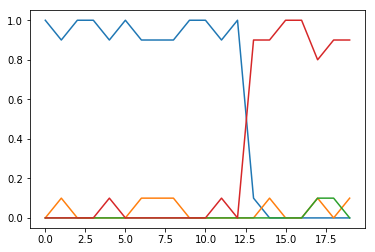

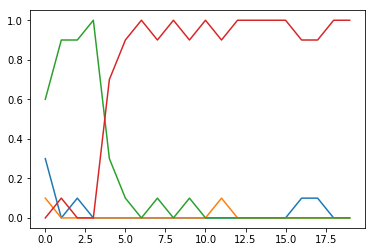

In [20]:
learnt_scores, total_score, [choicelist_1, choicelist_2, choicelist_3, choicelist_4] = q_learn(0.1,0.1,200)

# Width is de grote van elke bin
width = 10
# Hier knippen we de laatste (choicelist_1.size % width) elementen van de lijst
# Dan reshapen we naar een matrix van X * width en nemen we de mean over de width axis
# Hiermee krijgen we dus het gemiddelde aantal keer dat deze keuze gemaakt is voor width stappen
result1 = choicelist_1[:(choicelist_1.size // width * width)].reshape(-1, width).mean(axis=1)
result2 = choicelist_2[:(choicelist_2.size // width * width)].reshape(-1, width).mean(axis=1)
result3 = choicelist_3[:(choicelist_3.size // width * width)].reshape(-1, width).mean(axis=1)
result4 = choicelist_4[:(choicelist_4.size // width * width)].reshape(-1, width).mean(axis=1)
plt.plot(result1, label=r"$1$")
plt.plot(result2, label=r"$1$")
plt.plot(result3, label=r"$1$")
plt.plot(result4, label=r"$1$")
plt.show()

learnt_scores, total_score, [choicelist_1, choicelist_2, choicelist_3, choicelist_4] = q_learn(0.5,0.1,200)

result1 = choicelist_1[:(choicelist_1.size // width * width)].reshape(-1, width).mean(axis=1)
result2 = choicelist_2[:(choicelist_2.size // width * width)].reshape(-1, width).mean(axis=1)
result3 = choicelist_3[:(choicelist_3.size // width * width)].reshape(-1, width).mean(axis=1)
result4 = choicelist_4[:(choicelist_4.size // width * width)].reshape(-1, width).mean(axis=1)
plt.plot(result1, label=r"$1$")
plt.plot(result2, label=r"$1$")
plt.plot(result3, label=r"$1$")
plt.plot(result4, label=r"$1$")
plt.show()

### Q1.d (10 punten)

Laten we nu kijken hoe succesvol de verschillende strategieën (lees combinatie van parameter waardes) zijn. 

Schrijf nu een loop die `q_learn` 500 keer aanroept met een bepaalde parameter setting (en altijd 200 leerrondes) en sla telkens het totaal aantal punten op, zodat je aan het eind een lijst hebt van 500 totaal scores. 

Vergelijk het gemiddelde van die 500 totaalscores voor $\alpha=0.1$, $\alpha=0.3$ en $\alpha=0.5$ met $\epsilon=0.1$ voor alle experimenten. Leg uit hoe de verschillen tot stand komen. 


In [34]:
score_list1 = []
score_list3 = []
score_list5 = []
ep = 500

for i in range(ep):
    [_, total_score1, _] = q_learn(0.1, 0.1, 200)
    score_list1.append(total_score1)
    
    [_, total_score3, _] = q_learn(0.3, 0.1, 200)
    score_list3.append(total_score3)
    
    [_, total_score5, _] = q_learn(0.5, 0.1, 200)
    score_list5.append(total_score5)
    
print(f"alpha 0.1 mean total score = {np.mean(score_list1)}")
print(f"alpha 0.3 mean total score = {np.mean(score_list3)}")
print(f"alpha 0.5 mean total score = {np.mean(score_list5)}")

alpha 0.1 mean total score = 8432.818469466743
alpha 0.3 mean total score = 11451.773833014775
alpha 0.5 mean total score = 11924.135016932356


> Een hogere $\alpha$-waarde zorgt ervoor dat de agent uit het model sneller leert van de uitkomsten van de kisten. Dit verkleint de kans dat de agent een hogere value krijgt voor bijvoorbeeld Q1 dan voor Q2, als het door de willekeurigheid van de waarde uit de normaalverdeling een bepaalde mening vormt over deze kisten.

# Exploration-Exploitation

We gaan nu dieper in op het exploration vs. exploitation dilemma. Laten we eerst kijken hoe verschillende e parameters uitwerking hebben op het aantal punten dat gewonnen wordt. Gebruik hier de functie van q_learn van de vorige vraag met $\epsilon=0.05$, $\epsilon=0.2$ en $\epsilon=0.6$ en met $\alpha=0.3$ voor alle experimenten. 

### Q2.a (10 punten)

Kijk voor elke parameter setting weer naar de gemiddelde totaal score van 500 leer episodes. Waar ligt ongeveer het optimale niveau van exploratie?

In [33]:
e_list = [0.05, 0.2, 0.6]
alpha = 0.3
trials = 200
ep = 500

for epsilon in e_list:
    score_list = []
    for i in range(ep):
        [_, total_score, _] = q_learn(alpha, epsilon, trials)
        score_list.append(total_score)
    print(f"Epsilon {epsilon} mean total score = {np.mean(score_list)}")
    


Epsilon 0.05 mean total score = 10407.42850187573
Epsilon 0.2 mean total score = 11938.451203146231
Epsilon 0.6 mean total score = 10515.17902026963


> Met een $\epsilon$-waarde van 0.2 wordt de hoogste totaalscore behaald.

### Q2.b (10 punten)

Pas nu `q_learn` zo aan dat de parameter $\epsilon$ gedurende een leer episode steeds kleiner wordt. Dit kan bijvoorbeeld door elke ronde $\epsilon$ met een vast percentage te verkleinen (denk aan iets tussen 0 en 10%), maar andere manieren zijn ook mogelijk. Sla dit model op als `q_learn_decay`.

In [43]:
def q_learn_decay(alpha, epsilon, trials=200):
    Q1 = 0
    Q2 = 0
    Q3 = 0
    Q4 = 0
    Q1_list = np.zeros(trials)
    Q2_list = np.zeros(trials)
    Q3_list = np.zeros(trials)
    Q4_list = np.zeros(trials)
    K1 = 20
    K2 = 30
    K3 = 50
    K4 = 70
    sigma = 4
    total_score = 0
    decay = 0.01
    
    for i in range(trials):
        x = random.random()
        
        if x < epsilon:            
            ind = random.randrange(len([Q1, Q2, Q3, Q4]))
        else:
            ind = np.argmax([Q1, Q2, Q3, Q4])
         
        if ind == 0:
            s = np.random.normal(K1, sigma)
            Q1 += alpha*(s - Q1)
            Q1_list[i] = 1
        elif ind == 1:
            s = np.random.normal(K2, sigma)
            Q2 += alpha*(s - Q2)
            Q2_list[i] = 1
        elif ind == 2:
            s = np.random.normal(K3, sigma)
            Q3 += alpha*(s - Q3)
            Q3_list[i] = 1
        else:
            s = np.random.normal(K4, sigma)
            Q4 += alpha*(s - Q4)
            Q4_list[i] = 1
        
        total_score += s
        epsilon *= (1 - decay)
            
    return([Q1,Q2,Q3,Q4], total_score, [Q1_list, Q2_list, Q3_list, Q4_list])

### Q2.c (10 punten)

Kijk nu naar een aantal beginwaarden voor parameter $\epsilon$, en kijk welk model meer punten kan verdienen in de taak (verken hier waarden van $\epsilon$ tussen .1 en .9). Gebruik weer het gemiddelde aantal punten over 500 leer episodes (en nog steeds 200 rondes per episode en $\alpha =  0.3$). Welk model is het beste en waarom denk je dat dit zo is?


In [50]:
ep_list = list(range(1,10))
epList = [x / 10 for x in ep_list]
alpha = 0.3
trials = 200
ep = 500

for epsilon in epList:
    score_list = []
    for i in range(ep):
        [_, total_score, _] = q_learn_decay(alpha, epsilon, trials)
        score_list.append(total_score)
    print(f"Epsilon {epsilon} mean total score = {np.mean(score_list)}")

Epsilon 0.1 mean total score = 11000.569963160984
Epsilon 0.2 mean total score = 11955.12898428746
Epsilon 0.3 mean total score = 12400.600458790455
Epsilon 0.4 mean total score = 12448.555341380075
Epsilon 0.5 mean total score = 12474.847579536545
Epsilon 0.6 mean total score = 12343.932251486332
Epsilon 0.7 mean total score = 12181.812052098696
Epsilon 0.8 mean total score = 11989.131471481818
Epsilon 0.9 mean total score = 11820.744119546875


> De hoogste totaalscores liggen zowel bij $\epsilon$-startwaardes van 0.4 als 0.5. Een $\epsilon$-startwaarde van rond de 0.5 zorgt ervoor dat het model genoeg exploreert aan het begin, ten opzichte van lagere waardes als 0.1, terwijl het later ook zijn Q-waardes genoeg verifi\"eert, door Qmax te bekijken.

## Softmax

Een andere zeer populaire methode om exploratie te implementeren is de softmax regel. Deze kan gebruikt worden om de waarschijnlijkheid uit te rekenen dat de robot een specifieke kist kiest. Bijvoorbeeld de waarschijnlijkheid dat de robot op een bepaald moment kist 1 kiest is:

$$P(Q(1)) = \frac{e(Q(1)*theta)}{\sum_s e(Q(s)*theta)}$$

Voor kist 2:

$$P(Q(2)) = \frac{e(Q(2)*theta)}{\sum_s e(Q(s)*theta)}$$

En natuurlijk:

$$P(Q(1))+ P(Q(2)) +P(Q(3))+ P(Q(2)) = 1  (100\%)$$

want de robot kiest altijd een van de 4 opties, dus samen moeten dat 100% kans zijn.

Implementeer nu de softmax regel in de `q_learn` functie en geef deze de naam `q_learn_softmax`.

* Gebruik elke ronde de $P(Q)$ informatie om de robot een kist te laten kiezen.
* Zorg ook dat deze elke ronde de waarschijnlijkheid $P(Q)$ van het kiezen van elke kist wordt opgeslagen zodat we hier later weer naar kunnen kijken. 

Gebruik dit model weer om de gemiddelde score voor 500 episodes voor verschillende waardes van theta (waardes tussen $0.01$ en $1$, op zn minst 5) met elkaar te vergelijken, met wederom 200 rondes per episode en een $\alpha$ van $0.3$, gebruik makende van de methode die we hier boven ontwikkeld hebben. 


### Q3.a (10 punten)

Wat is ongeveer de optimale waarde voor theta, hoe verhoud dit model zich tot de simpele versie van $\epsilon$-greedy? Hoe gedraagt het model zicht met een hoge waarde van theta, en hoe met een lage?

In [49]:
def softmax(q_list, theta):
    q_list = np.array(q_list)
    p_list = []
    for i in range(len(q_list)):
        p_list.append(np.exp(q_list[i]*theta)/sum(np.exp(q_list*theta)))
    return p_list
    

def q_learn_softmax(alpha, trials, theta):
    Q1 = 0
    Q2 = 0
    Q3 = 0
    Q4 = 0
    Q1_list = np.zeros(trials)
    Q2_list = np.zeros(trials)
    Q3_list = np.zeros(trials)
    Q4_list = np.zeros(trials)
    K1 = 20
    K2 = 30
    K3 = 50
    K4 = 70
    sigma = 4
    total_score = 0
    
    for i in range(trials):
        
        ind = np.random.choice(4, p=softmax([Q1, Q2, Q3, Q4], theta))
         
        if ind == 0:
            s = np.random.normal(K1, sigma)
            Q1 += alpha*(s - Q1)
            Q1_list[i] = 1
        elif ind == 1:
            s = np.random.normal(K2, sigma)
            Q2 += alpha*(s - Q2)
            Q2_list[i] = 1
        elif ind == 2:
            s = np.random.normal(K3, sigma)
            Q3 += alpha*(s - Q3)
            Q3_list[i] = 1
        else:
            s = np.random.normal(K4, sigma)
            Q4 += alpha*(s - Q4)
            Q4_list[i] = 1
        
        total_score += s
            
    return([Q1,Q2,Q3,Q4], total_score, [Q1_list, Q2_list, Q3_list, Q4_list])

t_list = np.linspace(0.01, 1, 10)
alpha = 0.3
trials = 200
ep = 500

for theta in t_list:
    score_list = []
    for i in range(ep):
        [_, total_score, _] = q_learn_softmax(alpha, trials, theta)
        score_list.append(total_score)
    print(f"Theta {theta} total score = {np.mean(score_list)}")

Theta 0.01 total score = 9208.89945515291
Theta 0.12 total score = 12334.787996571426
Theta 0.23 total score = 10828.326878731326
Theta 0.34 total score = 9868.118563592338
Theta 0.45 total score = 8908.408397573761
Theta 0.56 total score = 8754.150527943548
Theta 0.67 total score = 8521.558884913651
Theta 0.78 total score = 8568.116495783564
Theta 0.89 total score = 8667.525343782176
Theta 1.0 total score = 8533.719069889843


> Het model vertoont dezelfde kenmerken als het $\epsilon$-greedy model. De hoogste waarde van total_score komt vroeg, namelijk rond een $\theta$-waarde van 0.12, waar het maximum van $\epsilon$-greedy lag rond een waarde van 0.2. De totaalscore wordt lager naarmate de $\theta$-waarde voorbij 0.12 komt en neemt vanaf dit punt tot $\epsilon$ = 0.5 geleidelijk af, waarna de waarde ongeveer hetzelfde blijft.

## Model fitting

We gaan nu kijken naar de resultaten van een echt experiment. We hebben de data van een proefpersoon die het bovenstaande experiment heeft gespeeld. In de data file kunnen we terugvinden welke van de 4 opties zij gekozen had en hoeveel punten vervolgens elke trial verdient zijn. We gaan kijken met welke parameter waardes  Q-learning met een softmax choice rule het gedrag van de proefpersonen het beste kan voorspellen. De proefpersoon heeft 80 rondes gespeelt. 

Lees de data in uit *L4_data_1.txt* met behulp van [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html):
```python
with open("L4_data_1.txt") as f:
    data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)
```

Pas de `q_learn_softmax` functie aan zodat je deze op de data van de proefpersonen kan fitten. (Zie LC1 voor details over hoe functies gefit moeten worden, en pseudo code onderaan voor meer hulp).

Ga er van uit dat de proefpersonen enige ervaring hebben met dit type experiment en verwachten dat ze gemiddeld wel 40 punten per ronde gaan verdienen (alle Q’s starten op 40 ipv 0). 

We gaan voor het fitten van het model gebruik maken van minimize van scipy.optimize (`from scipy.optimize import minimize`) en we gaan proberen *Log Likelihood* te optimaliseren (mate van fit). 

Wat we op elke trial willen weten is wat de waarschijnlijkheid is dat het model dezelfde keuze maakte als de proefpersoon. Hoe groter de kans (likelihood) dat het model correct kiest, hoe beter het model "fit". 

In het databestand van de proefpersoon kunnen zien welke van de 4 kisten de proefpersoon koos. Dit kunnen we dan op elke ronde vergelijken met de corresponderende P(Q). In de eerste ronde zijn alle Q values nog gelijk dus zijn alle P(Q)s = .25.

Voor de eerste ronde geld daarom automatisch dan waarschijnlijkheid (likelihood) van de keuze van de proefpersoon ook .25 is, maar dat gaat veranderen naarmate er geleerd wordt. 

In het databestand staat ook voor elke ronde wat de uitkomst van een keuze was, deze moet gebruikt worden om vervolgens de Q-values aan te passen, net als we eerder gedaan hebben in de simulaties.

De output van deze functie moet de som van alle *log(P(Q(chosen)))* zijn. Let op vermenigvuldig deze som met -1. Dat doen we omdat minimize de functie probeert te minimaliseren , en we opzoek zijn naar de max LL (double negative). 

`**pseudo code**:`
```python
def q_learn_softmax_fit(params):
    alpha, theta, init_value = params
    nArms = 4
    Q = np.array([init_value]*nArms)
    LL = 0
    
    for row in data:
        probs <- calculate probability of chosing each option based on theta, Qvalues and softmax
        
        choice <- read choice from data (each trial is one row in file)
        outcome <- read outcomee of choice from data
        
        LL += np.log(probs[choice])
        
        Q[choice] <- update Q value
    
    # Scaled for minimize function
    return -1*LL

# minimize takes a few arguments (function, array of initial parameter values, minimization methods,
# bounds are the bounds on each parameter; use bounds (same, same) to fix parameter to a single value
res = minimize(q_learn_softmax_fit, np.array([0.5, 0.5, 40]), method='SLSQP',
               bounds=[(0,1), (0,10), (40,40)], options={'disp':True, 'ftol':1e-16})
```

### Q4.a (10 punten)

Welke parameterwaarden fitten de data van de proefpersoon het beste? Probeer eens een hogere start waarde voor Q values (>80) en hoe beïnvloed dit de model fit? 
minimize geeft ook de uiteindelijke summed LL (negatief) van het best fittende model. Deze score kan je weer omrekenen naar een gemiddelde likelihood (kans dat model juiste trial koos) per trial. Doe dit, een beoordeel de uitkomst.

In [55]:
from scipy.optimize import minimize

def q_learn_softmax_fit(params):
    alpha, theta, init_value = params
    
    with open("L4_data_1.txt") as f:
        data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)
    
    nArms = 4
    Q = np.array([init_value]*nArms)
    LL = 0

    for row in data:
        probs = softmax(Q, theta)

        choice = row[1] - 1
        outcome = row[2]

        LL += np.log(probs[choice])

        Q[choice] += alpha*(outcome - Q[choice])

    # Scaled for minimize function
    return -1*LL

with open("L4_data_1.txt") as f:
    data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)
    
print("startwaarde Q = 40")
res = minimize(q_learn_softmax_fit, np.array([0.5, 0.5, 40]), method='SLSQP',
               bounds=[(0,1), (0,10), (40,40)], options={'disp':True, 'ftol':1e-16})

print(f"de parameters {res.x} fitten de persoon het best")
print(f"de gemiddelde likelihood = {np.exp(-1*res.fun/len(data))}\n\n")

print("startwaarde Q = 100")
res = minimize(q_learn_softmax_fit, np.array([0.5, 0.5, 100]), method='SLSQP',
               bounds=[(0,1), (0,10), (100,100)], options={'disp':True, 'ftol':1e-16})

print(f"de parameters {res.x} fitten de persoon het best")
print(f"de gemiddelde likelihood = {np.exp(-1*res.fun/len(data))}\n\n")

startwaarde Q = 40
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 56.081857619579395
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12
de parameters [ 0.48925202  0.23180105 40.        ] fitten de persoon het best
de gemiddelde likelihood = 0.49607744752404526


startwaarde Q = 100
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 110.90354888959129
            Iterations: 7
            Function evaluations: 15
            Gradient evaluations: 3
de parameters [  0.99999892   0.         100.        ] fitten de persoon het best
de gemiddelde likelihood = 0.24999999999999983




> Het best fittende model van een Q-startwaarde van 40 ligt bij een $\alpha$-waarde van rond de 0.5, en een $\theta$-waarde van 0.23. Als de Q-startwaarde verhoogd wordt naar 100, nadert de optimale $\alpha$-waarde de 1, en de $\theta$ de 0.

### Q4.b (10 punten)

Herschrijf de functie nogmaals en zorg ervoor dat de initialisatie van de Q waarde (de start Q waarden) ook een vrije parameter wordt. Als je dit doet kan je de start waarde vinden die het best bij het gedrag van de proefpersoon past. Rapporteer, en interpreteer deze waarde. En zorgt dit ook voor een betere model fit?

In [56]:
res = minimize(q_learn_softmax_fit, np.array([0.5, 0.5, 40]), method='SLSQP',
               bounds=[(0,1), (0,10), (0,10000)], options={'disp':True, 'ftol':1e-16})

res.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 26.010035104746027
            Iterations: 19
            Function evaluations: 113
            Gradient evaluations: 19


array([ 0.57894821,  0.25470942, 24.07207659])

> Het variable maken van de Q startwaarden zorgt voor een uiteindelijke startwaarde van 24.07 wat lijkt op de 25% kans dat een kist wordt gekozen in het begin. Het heeft ook gezorgd voor een veel hogere gemiddelde likelihood. Het heeft er dus voor gezorgd dat de fit beter is geworden

### Q4.c (10 punten)

Als we de functie een klein beetje herschrijven kunnen we deze gebruiken om in het hoofd van de proefpersoon te kijken. Bijvoorbeeld we willen nu weten welke Q-values zij aan de verschillende bandits toekent. 

Hiervoor is alleen een kleine verandering nodig, waarbij de functie nu niet meer de LogLikelihood als output heeft maar de lijst met Q values. Pas de functie `q_learn_softmax_fit` aan zodat deze de Q-values returnt en noem de nieuwe functie `q_learn_fitted_model`. Zorg hierbij dat de `params` lijst van argumenten ook hetzelfde blijft als bij de `q_learn_softmax_fit`.

Nu hoef je ook niet meer de functie fitten of minimalizeren maar alleen aan te roepen, gebruik makende van de beste gevonden `params` van de vorige stap.

`q_learn_fitted_model(res.x)`

Rapporteer de Q values van deze proefpersoon. In werkelijkheid waren de gemiddelde waardes van den bandits (50, 30, 20, 80). Hoe wijkt de proefpersoon hier van af en hoe is dat te verklaren (hint: kijk naar keuze gedrag, dus de selectie van bandits, in de data file)?


In [ ]:
def q_learn_fitted_model(params):
    alpha, theta, init_value = params
    
    with open("L4_data_1.txt") as f:
        data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)
    
    nArms = 4
    Q = np.array([init_value]*nArms)

    for row in data:
        probs = softmax(Q, theta)

        choice = row[1] - 1
        outcome = row[2]


        Q[choice] += alpha*(outcome - Q[choice])

    # Scaled for minimize function
    return Q

q_learn_fitted_model(res.x)

> De waardes van bandits 1 en 4 lijken sterk op de echte waardes terwijl bandits 2 en 3 meer afwijken. Dit komt doordat de proefpersoon heel weinig bandits 2 en 3 kiest en wel vaak bandits 1 en 4 waardoor de Q waarde van 1 en 4 wel wordt geupdate.